In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import json
import os
import seaborn as sns
from numpy import median
import numpy as np
%matplotlib inline

In [13]:
env='Humanoid-v4'

In [14]:
!echo $PYTHONPATH

/home/daniel/COMPER-GYM-RESULTS


In [15]:
df_comper = pd.DataFrame()
for i in range(1,6):
  path ='COMPER_DDPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_comper = pd.concat([df_comper,aux])
df_comper["Method"]="COMPER"
#df_comper = df_comper.set_index(["Trial"])

print(df_comper.shape)

(243978, 17)


In [16]:
df_ddpg = pd.DataFrame()
for i in range(1,6):
  path ='DPPG/data/'+env+'/train/trial'+str(i)+'/progress.json'
  aux = pd.read_json(path,lines=True)    
  df_ddpg = pd.concat([df_ddpg,aux])
df_ddpg["Method"]="DDPG"
#df_ddpg = df_ddpg.set_index(["Trial"])
print(df_ddpg.shape)

#/home/daniel/COMPER-GYM-RESULTS/DPPG/data/Ant-v4/train/trial1/progress.json

(243768, 17)


In [17]:
df_comper.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Humanoid-v4,16-07-2023 16:22:24,49,0,49,0.002435,1,50,True,260.395965,260.395965,260.395965,260.395965,260.395965,COMPER
1,1,2,Humanoid-v4,16-07-2023 16:22:25,50,0,50,0.002485,1,51,True,266.295727,263.345846,263.345846,263.345846,263.345846,COMPER
2,1,3,Humanoid-v4,16-07-2023 16:22:26,51,0,51,0.002535,1,52,True,272.212025,266.301239,266.301239,266.301239,266.301239,COMPER
3,1,4,Humanoid-v4,16-07-2023 16:22:28,52,0,52,0.002585,1,53,True,278.125595,269.257328,269.257328,269.257328,269.257328,COMPER
4,1,5,Humanoid-v4,16-07-2023 16:22:29,53,0,53,0.002634,1,54,True,284.045160,272.214895,272.214895,272.214895,272.214895,COMPER
5,1,6,Humanoid-v4,16-07-2023 16:22:30,54,0,54,0.002684,1,55,True,290.206413,275.213481,275.213481,275.213481,275.213481,COMPER
6,1,7,Humanoid-v4,16-07-2023 16:22:31,55,0,55,0.002734,1,56,True,296.340415,278.231614,278.231614,278.231614,278.231614,COMPER
7,1,8,Humanoid-v4,16-07-2023 16:22:33,56,0,56,0.002783,1,57,True,302.257568,281.234859,281.234859,281.234859,281.234859,COMPER
8,1,9,Humanoid-v4,16-07-2023 16:22:34,57,0,57,0.002833,1,58,True,308.134370,284.223693,284.223693,284.223693,284.223693,COMPER
9,1,10,Humanoid-v4,16-07-2023 16:22:36,58,0,58,0.002883,1,59,True,314.082409,287.209565,287.209565,287.209565,287.209565,COMPER


In [18]:
df_ddpg.head(15)

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Humanoid-v4,12-07-2023 20:25:46,16,17,0,0.000795,1,17,True,77.766375,77.766375,77.766375,77.766375,77.766375,DDPG
1,1,2,Humanoid-v4,12-07-2023 20:25:46,17,18,0,0.000845,1,18,True,82.686474,80.226424,80.226424,80.226424,80.226424,DDPG
2,1,3,Humanoid-v4,12-07-2023 20:25:46,18,19,0,0.000895,1,19,True,87.677073,82.709974,82.709974,82.709974,82.709974,DDPG
3,1,4,Humanoid-v4,12-07-2023 20:25:46,19,20,0,0.000944,1,20,True,92.646089,85.194003,85.194003,85.194003,85.194003,DDPG
4,1,5,Humanoid-v4,12-07-2023 20:25:46,20,21,0,0.000994,1,21,True,97.592705,87.673743,87.673743,87.673743,87.673743,DDPG
5,1,6,Humanoid-v4,12-07-2023 20:25:46,21,22,0,0.001044,1,22,True,102.543435,90.152025,90.152025,90.152025,90.152025,DDPG
6,1,7,Humanoid-v4,12-07-2023 20:25:46,22,23,0,0.001093,1,23,True,107.507860,92.631430,92.631430,92.631430,92.631430,DDPG
7,1,8,Humanoid-v4,12-07-2023 20:25:46,23,24,0,0.001143,1,24,True,112.710085,95.141262,95.141262,95.141262,95.141262,DDPG
8,1,9,Humanoid-v4,12-07-2023 20:25:46,24,25,0,0.001193,1,25,True,118.059983,97.687786,97.687786,97.687786,97.687786,DDPG
9,1,10,Humanoid-v4,12-07-2023 20:25:47,25,26,0,0.001243,1,26,True,123.486165,100.267624,100.267624,100.267624,100.267624,DDPG


In [19]:
df=pd.concat([df_comper,df_ddpg])
df.head()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
0,1,1,Humanoid-v4,16-07-2023 16:22:24,49,0,49,0.002435,1,50,True,260.395965,260.395965,260.395965,260.395965,260.395965,COMPER
1,1,2,Humanoid-v4,16-07-2023 16:22:25,50,0,50,0.002485,1,51,True,266.295727,263.345846,263.345846,263.345846,263.345846,COMPER
2,1,3,Humanoid-v4,16-07-2023 16:22:26,51,0,51,0.002535,1,52,True,272.212025,266.301239,266.301239,266.301239,266.301239,COMPER
3,1,4,Humanoid-v4,16-07-2023 16:22:28,52,0,52,0.002585,1,53,True,278.125595,269.257328,269.257328,269.257328,269.257328,COMPER
4,1,5,Humanoid-v4,16-07-2023 16:22:29,53,0,53,0.002634,1,54,True,284.045160,272.214895,272.214895,272.214895,272.214895,COMPER


In [20]:
df.tail()

,Trial,LogCount,Task,Time,TotalItr,TMCount,RTMCount,e,Ep,EpItr,Done,EpRew,AvgEp,Avg100Ep,AvgLast50Ep,AvgLast10Ep,Method
48851,5,48852,Humanoid-v4,14-07-2023 11:46:12,49997,49998,0,0.999,50,998,True,4773.420511,2471.507665,4535.614786,4656.174967,4751.749458,DDPG
48852,5,48853,Humanoid-v4,14-07-2023 11:46:13,49998,49999,0,0.999,50,999,True,4778.148874,2471.554881,4540.414345,4660.953552,4756.582274,DDPG
48853,5,48854,Humanoid-v4,14-07-2023 11:46:14,49999,50000,0,0.999,50,1000,True,4782.857314,2471.602191,4545.212809,4665.727097,4761.393335,DDPG
48854,5,48855,Humanoid-v4,14-07-2023 11:46:15,50000,50001,0,0.999,50,1001,True,4787.559390,2471.649596,4550.010116,4670.495950,4766.184285,DDPG
48855,5,48856,Humanoid-v4,14-07-2023 11:46:17,50001,50002,0,0.999,51,2,True,4.735869,2471.599103,4506.931094,4579.509615,4292.204414,DDPG


KeyboardInterrupt: 

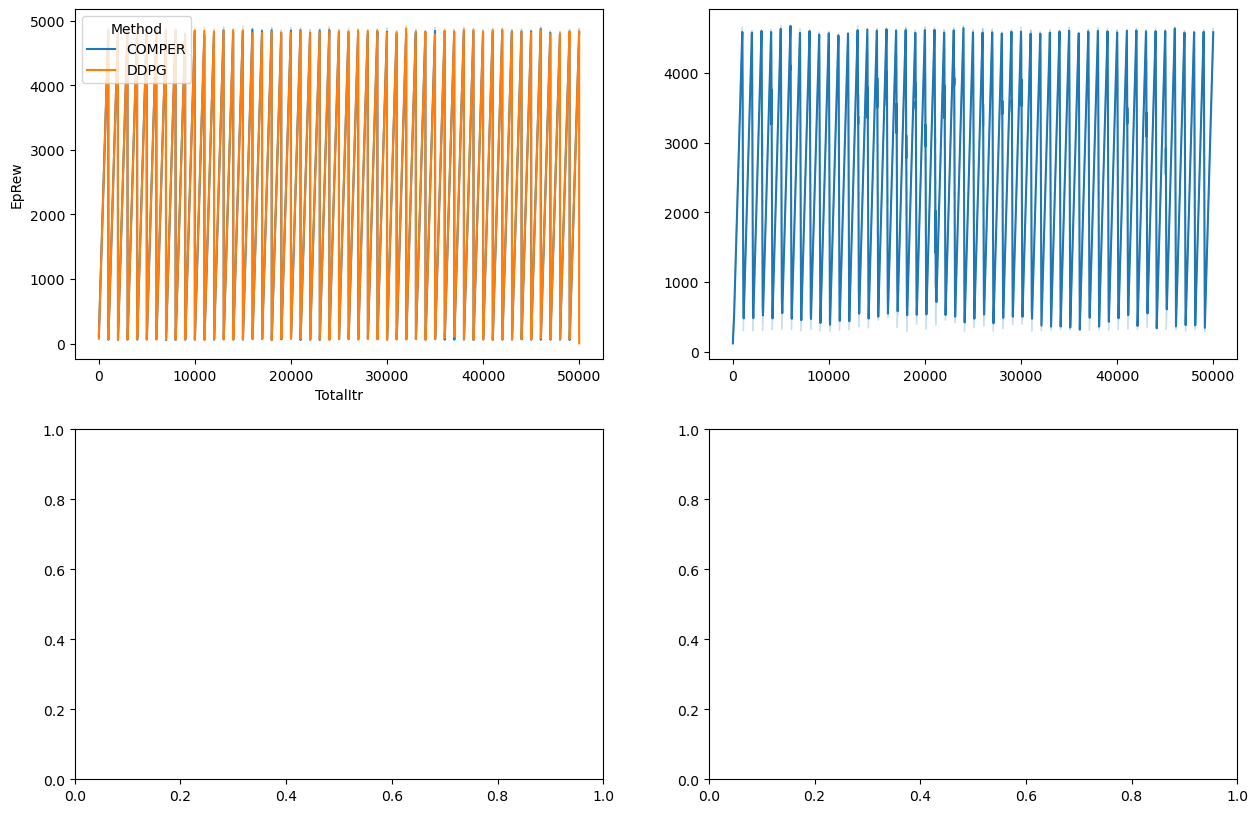

In [21]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])


KeyboardInterrupt: 

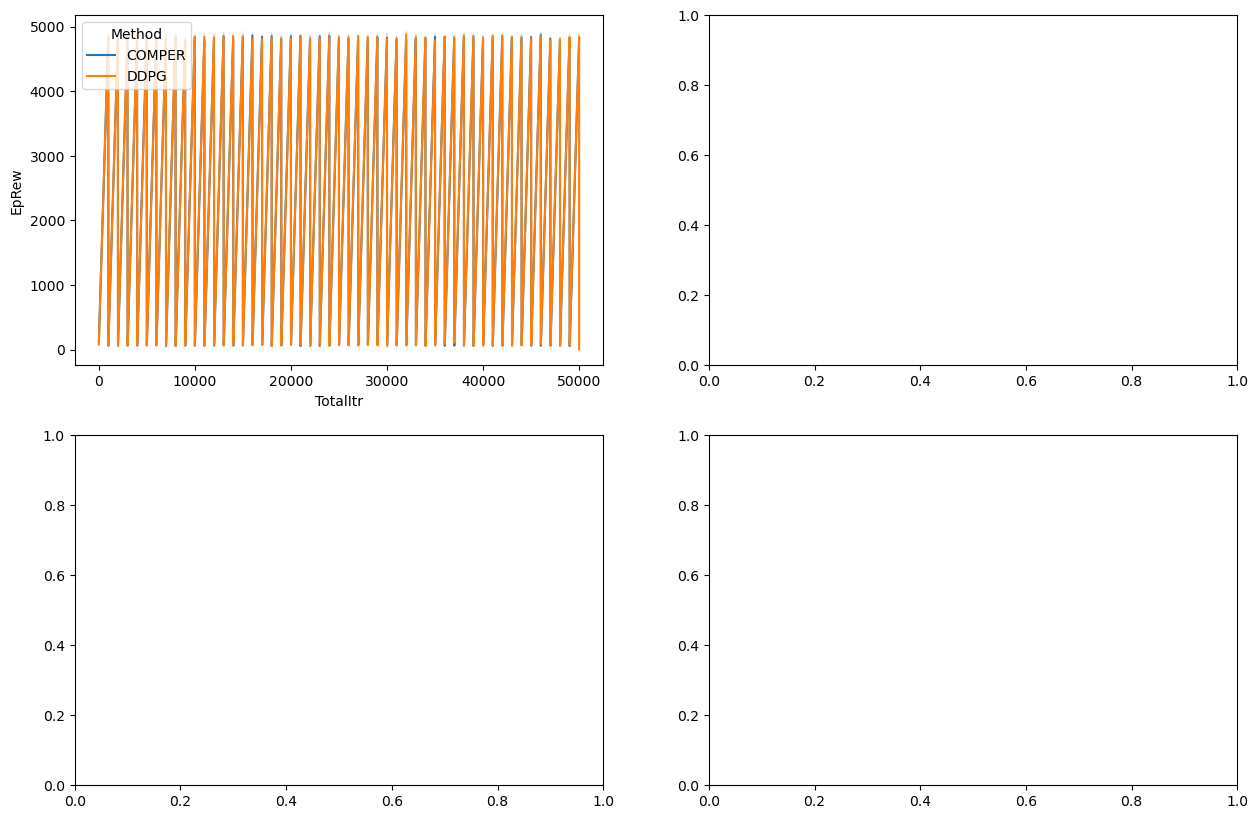

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=2)
fig.set_figwidth(15)
fig.set_figheight(10)
sns.lineplot(data=df, x="TotalItr", y="EpRew",hue='Method',ax=axs[0][0])
sns.lineplot(data=df, x="TotalItr", y="Avg100Ep",hue="Method",ax=axs[0][1])
sns.lineplot(data=df, x="TotalItr", y="AvgLast50Ep",hue="Method",ax=axs[1][0])
sns.lineplot(data=df, x="TotalItr", y="AvgLast10Ep",hue="Method",ax=axs[1][1])

In [ ]:
path ='COMPER_DDPG/data/'+env+'/eval/progress.json'
df_comper_eval = pd.read_json(path,lines=True)
df_comper_eval["Method"]="COMPER"
#df_comper_eval=df_comper_eval[df_comper_eval["Trial"]==1]
print(df_comper_eval.shape)
df_comper_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,17-05-2023 23:56:21,Humanoid-v4,5000,26.026164,COMPER
1,1,18-05-2023 04:18:38,Humanoid-v4,10000,26.017717,COMPER
2,1,18-05-2023 08:52:21,Humanoid-v4,15000,25.973219,COMPER
3,1,18-05-2023 13:36:54,Humanoid-v4,20000,26.024145,COMPER
4,1,18-05-2023 18:34:59,Humanoid-v4,25000,25.958576,COMPER


In [ ]:
df_comper_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,26.005455
std,1.428571,14507.211437,0.043666
min,1.000000,5000.000000,25.903504
25%,2.000000,15000.000000,25.971965
50%,3.000000,27500.000000,26.009584
75%,4.000000,40000.000000,26.033586
max,5.000000,50000.000000,26.091451


In [ ]:
path ='DPPG/data/'+env+'/eval/progress.json'
df_ddpg_eval = pd.read_json(path,lines=True)
#df_ddpg_eval=df_ddpg_eval[df_ddpg_eval["Trial"]==1]
df_ddpg_eval["Method"]="DDPG"
print(df_ddpg_eval.shape)
df_ddpg_eval.head()

(50, 6)


,Trial,Time,Task,Int,EvalAvgRew,Method
0,1,10-06-2023 15:06:23,Humanoid-v4,5000,26.010854,DDPG
1,1,10-06-2023 15:25:17,Humanoid-v4,10000,26.032528,DDPG
2,1,10-06-2023 15:54:26,Humanoid-v4,15000,26.040588,DDPG
3,1,10-06-2023 16:32:54,Humanoid-v4,20000,26.051401,DDPG
4,1,10-06-2023 17:20:42,Humanoid-v4,25000,26.067295,DDPG


In [ ]:
df_ddpg_eval.describe()

,Trial,Int,EvalAvgRew
count,50.000000,50.000000,50.000000
mean,3.000000,27500.000000,26.007037
std,1.428571,14507.211437,0.043674
min,1.000000,5000.000000,25.919321
25%,2.000000,15000.000000,25.972083
50%,3.000000,27500.000000,26.011175
75%,4.000000,40000.000000,26.040304
max,5.000000,50000.000000,26.094292


In [ ]:
df_eval=pd.concat([df_comper_eval,df_ddpg_eval])
df_eval.rename(columns = {'Int':'Itr'}, inplace = True)

<Axes: xlabel='Itr', ylabel='EvalAvgRew'>

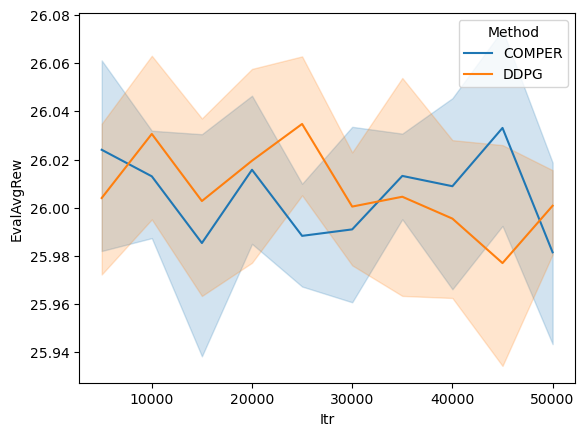

In [ ]:
sns.lineplot(data=df_eval, x="Itr", y="EvalAvgRew",hue='Method')